# Boilerplate

In [1]:
import pandas as pd
import numpy as np
import time
df = pd.read_csv('ratings_Beauty.csv')
df = df.dropna()
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [7]:
user_count = df[["ProductId","UserId"]].groupby("UserId").count()
user_count = user_count[user_count["ProductId"] >= 50]
print(user_count.head())

                ProductId
UserId                   
A100WO06OQR8BQ         53
A1047EDJ84IMAS         65
A11I1I9QLMAM1A         72
A132ETQPMHQ585         87
A135SX8ESCQV9B         52


In [8]:
product_count = df[["ProductId","UserId"]].groupby("ProductId").count()
product_count = product_count[product_count["UserId"] >= 10]
print(product_count.head())

            UserId
ProductId         
B00004TMFE      18
B00004TUBL      12
B00004U9UY      11
B000050B6U      30
B000052WYD      40


In [9]:
df = df[df["UserId"].isin(user_count.index) & df["ProductId"].isin(product_count.index)]

In [10]:
df

,UserId,ProductId,Rating,Timestamp
2492,A2VOGNBUMXSW13,B00004TMFE,2.0,1357516800
3335,A3AZI828WJN1CD,B00004U9UY,4.0,1357344000
3450,A3S3R88HA0HZG3,B00004U9UY,5.0,1238544000
3881,A22CW0ZHY3NJH8,B000050B6U,2.0,1372896000
4303,AKMEY1BSHSDG7,B000052WYD,1.0,1384732800
...,...,...,...,...
2022169,A1Q1Z7IR79G52A,B00L3K91OW,5.0,1404345600
2022223,A1Q1Z7IR79G52A,B00L3LB0IG,5.0,1404345600
2022237,A1Q1Z7IR79G52A,B00L3LBUGI,5.0,1404345600
2022808,A390XPHE9J7DBO,B00L5KTZ0K,5.0,1405123200


In [11]:
ratings_matrix = df.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_matrix

ProductId,B00004TMFE,B00004U9UY,B000050B6U,B000052WYD,B000052WYL,B000052WYN,B000052XW5,B000052XZP,B000052YJM,B000052YJX,...,B00KQVTX06,B00KTAJAIY,B00KTLBDYM,B00KTLBEEQ,B00KXG8JF4,B00L0C529Q,B00L3K91OW,B00L3LB0IG,B00L3LBUGI,B00L5KTZ0K
UserId,,,,,,,,,,,,,,,,,,,,,
A100WO06OQR8BQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1047EDJ84IMAS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A11I1I9QLMAM1A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A132ETQPMHQ585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A135SX8ESCQV9B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AXK3KYH8NQ9G2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AXYVSHTLWBINI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AY3D7DG5L5WCK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X = ratings_matrix

## Ground Truth - 

In [41]:
from sklearn.utils.extmath import randomized_svd
start = time.time()
U, Sigma, vh = randomized_svd(X, 
                              n_components=10,
                              n_iter=50,
                              random_state=None)
print(time.time()-start)

0.23482012748718262


In [42]:
product = np.dot(U,U.T)
np.fill_diagonal(product,0)
if (product.any() == 0):
    print("orth")

In [53]:
a

array([160.78727336,  71.40096496,  66.76322024,  61.34508072,
        59.96523173,  57.36243958,  53.39748437,  51.0637572 ,
        50.27906774,  48.79593325])

In [54]:
np.dot(b[:,0],b[:,9])

-9.717670190669686e-17

In [45]:
def isOrthogonal(a, m, n) :
    if (m != n) :
        return False
     
    # Multiply A*A^t
    for i in range(0, n) :
        for j in range(0, n) :
            sum = 0
            for k in range(0, n) :
         
                # Since we are multiplying
                # with transpose of itself.
                # We use a[j][k] instead
                # of a[k][j]
                sum = sum + (a[i][k] *
                             a[j][k])
         
        if (i == j and sum != 1) :
            return False
        if (i != j and sum != 0) :
            return False
 
    return True

isOrthogonal(t[0],t[0].shape[0],t[0].shape[1])

False

In [63]:
l = {"power":abs(np.trace(np.matmul(b.T, b) - np.eye(b.shape[1]))), "sklearn":abs(np.trace(np.matmul(U.T, U) - np.eye(U.shape[1]))), "lanczos":abs(np.trace(np.matmul(t[0].T, t[0]) - np.eye(t[0].shape[1])))}
plt.bar(l.keys(), l.values(), color='g')
# l.append(abs(np.trace(np.matmul(t[0].T, t[0]) - np.eye(t[0].shape[1]))))

In [59]:
l.append(abs(np.trace(np.matmul(b.T, b) - np.eye(b.shape[1]))))

In [60]:
l.append(abs(np.trace(np.matmul(U.T, U) - np.eye(U.shape[1]))))

<BarContainer object of 3 artists>

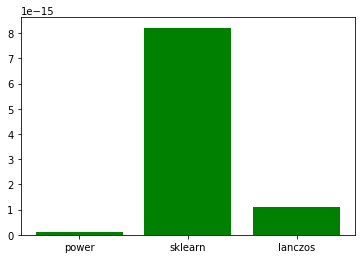

In [66]:
import matplotlib.pyplot as plt
plt.bar(l.keys(), l.values(), color='g')

In [21]:
lam_truth = Sigma[0]

In [22]:
vh[:,0]

array([ 1.53311174e-05,  1.13094790e-05,  1.06969806e-04,  1.81468730e-04,
        5.16161295e-05,  6.48964993e-04, -1.31080795e-04,  8.08407781e-04,
        2.38265633e-04,  1.82342664e-04])

In [28]:
vh[:,1150]

array([ 2.68764676e-05,  1.98654358e-04,  3.74247845e-04,  1.13793359e-03,
       -7.51103508e-04,  2.82049707e-04,  1.31439534e-05,  3.19938417e-04,
        6.61986931e-05, -1.36734015e-04])

# Generating recommendations -

In [163]:
def cosine_similarity(v,u):
    return (v @ u)/ (np.linalg.norm(v) * np.linalg.norm(u))

input_product = 1

highest_similarity = -np.inf
highest_sim_col = -1
for col in range(0,vh.shape[1]):
    if col!=input_product:
        similarity = cosine_similarity(vh[:,input_product], vh[:,col])
        if similarity > highest_similarity:
            highest_similarity = similarity
            highest_sim_col = col

print(f"Column {highest_sim_col} is most similar to Input product")

Column 1069 is most similar to Input product


<AxesSubplot:xlabel='UserId'>

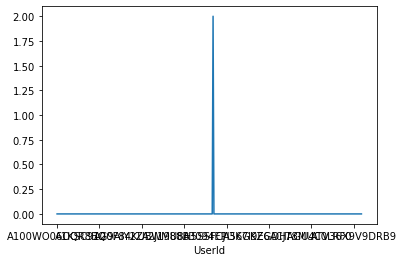

In [162]:
ratings_matrix["B00004TMFE"].plot()

<AxesSubplot:xlabel='UserId'>

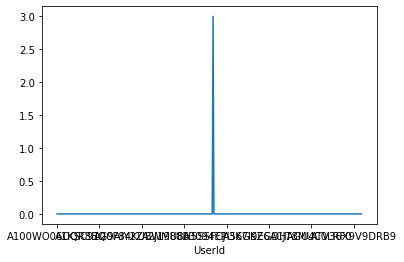

In [31]:
ratings_matrix.iloc[:,1150].plot()

## 1. SVD using Power Iteration

In [49]:
from numpy.linalg import norm

from random import normalvariate
from math import sqrt


def randomUnitVector(n):
    unnormalized = [normalvariate(0, 1) for _ in range(n)]
    theNorm = sqrt(sum(x * x for x in unnormalized))
    return [x / theNorm for x in unnormalized]


def svd_1d(A, epsilon=1e-10):
    ''' The one-dimensional SVD '''
    pow_lam = []
    n, m = A.shape
    x = randomUnitVector(min(n,m))
    lastV = None
    currentV = x

    if n > m:
        B = np.dot(A.T, A)
    else:
        B = np.dot(A, A.T)

    iterations = 0
    while True:
        iterations += 1
        lastV = currentV
        currentV = np.dot(B, lastV)
        currentV = currentV / norm(currentV)
        lam = norm(np.dot(A.T, currentV))
        pow_lam.append(abs(lam_truth-lam))
        if abs(np.dot(currentV, lastV)) > 1 - epsilon:
            print("converged in {} iterations!".format(iterations))
            return currentV, pow_lam


def svd(A, k=None, epsilon=1e-10):
    '''
        Compute the singular value decomposition of a matrix A
        using the power method. A is the input matrix, and k
        is the number of singular values you wish to compute.
        If k is None, this computes the full-rank decomposition.
    '''
    A = np.array(A, dtype=float)
    n, m = A.shape
    svdSoFar = []
    if k is None:
        k = min(n, m)

    for i in range(k):
        matrixFor1D = A.copy()

        for singularValue, u, v in svdSoFar[:i]:
            matrixFor1D -= singularValue * np.outer(u, v)

        if n > m:
            v, pow_lam = svd_1d(matrixFor1D, epsilon=epsilon)  # next singular vector
            if i == 0:
                pow_lam1 = pow_lam
            u_unnormalized = np.dot(A, v)
            sigma = norm(u_unnormalized)  # next singular value
            u = u_unnormalized / sigma
        else:
            u, pow_lam = svd_1d(matrixFor1D, epsilon=epsilon)  # next singular vector
            if i == 0:
                pow_lam1 = pow_lam
            v_unnormalized = np.dot(A.T, u)
            sigma = norm(v_unnormalized)  # next singular value
            v = v_unnormalized / sigma

        svdSoFar.append((sigma, u, v))
        print((sigma * np.outer(u, v)).shape)
    
    singularValues, us, vs = [np.array(x) for x in zip(*svdSoFar)]
    return singularValues, us.T, vs, pow_lam1

In [50]:
import time
start = time.time()
a,b,c,pow_errors = svd(X, 10)
print(time.time()-start)

converged in 9 iterations!
(211, 2609)
converged in 63 iterations!
(211, 2609)
converged in 57 iterations!
(211, 2609)
converged in 180 iterations!
(211, 2609)
converged in 80 iterations!
(211, 2609)
converged in 85 iterations!
(211, 2609)
converged in 94 iterations!
(211, 2609)
converged in 242 iterations!
(211, 2609)
converged in 151 iterations!
(211, 2609)
converged in 120 iterations!
(211, 2609)
0.2969520092010498


## 2. SVD Using Lanczoz algorithm

In [27]:
import numpy as np
import scipy.sparse as sp
import warnings
#import pdb

lanc_errors = []

def orthog(Y,X):
    """Orthogonalize a vector against the columns of the matrix X.
    """
    orth_Y = X.T@Y
    return Y - X@orth_Y

def lanczos(A,n,tol=0.0001,maxit=50):
    nu     = n
    m      = A.shape[0]
    n      = A.shape[1]
    if(min(m,n)<2):
        raise Exception("The input matrix must be at least 2x2.")
    m_b    = min((nu+20, 3*nu, n))  # Working dimension size
    mprod  = 0
    it     = 0
    j      = 0
    k      = nu
    smax   = 1

    C  = np.zeros((n,m_b))
    Q  = np.zeros((m,m_b))
    F  = np.zeros((n,1))
    B  = np.zeros((m_b,m_b))

    C[:,0]  = np.random.randn(n) # Initial vector
    C[:,0]  = C[:,0]/np.linalg.norm(C)
    
    while(it < maxit):
        if(it>0): 
            j=k
        Q[:,j] = A @ C[:,j]
        mprod+=1
        if(it>0):
            Q[:,j] = orthog(Q[:,j],Q[:,0:j]) # NB Q[:,0:j] selects columns 0,1,...,j-1
        s = np.linalg.norm(Q[:,j])
        Q[:,j] = Q[:,j]/s
        # Lanczos process
        while(j<m_b):
            F = A.T @ Q[:,j]
            mprod+=1
            F = F - s*C[:,j]
            F = orthog(F,C[:,0:j+1])
            fn = np.linalg.norm(F)
            F = F/fn
            if(j<m_b-1):
                C[:,j+1] = F
                B[j,j] = s
                B[j,j+1] = fn 
                Q[:,j+1] = A @ C[:,j+1]
                mprod+=1
                # One step of classical Gram-Schmidt...
                Q[:,j+1] = Q[:,j+1] - fn*Q[:,j]
                # ...with full reorthogonalization
                Q[:,j+1] = orthog(Q[:,j+1],Q[:,0:(j+1)])
                s = np.linalg.norm(Q[:,j+1])
                Q[:,j+1] = Q[:,j+1]/s

            else:
                B[j,j] = s
            j+=1
        # End of Lanczos process
        S = np.linalg.svd(B)
        lanc_errors.append(abs(lam_truth-S[1][0]))
        R = fn * S[0][m_b-1,:] # Residuals
        if(it<1):
            smax = S[1][0]  # Largest Ritz value
        else:
            smax = max((S[1][0],smax))

        conv = sum(np.abs(R[0:nu]) < tol*smax)
        if(conv < nu):  # Not coverged yet
            k = max(conv+nu,k)
            k = min(k,m_b-3)
        else:
            break
        # Update the Ritz vectors
        C[:,0:k] = C[:,0:m_b].dot(S[2].T[:,0:k])
        C[:,k] = F 
        B = np.zeros((m_b,m_b))
        for l in range(0,k):
            B[l,l] = S[1][l]
        B[0:k,k] = R[0:k]
        # Update the left approximate singular vectors
        Q[:,0:k] = Q[:,0:m_b].dot(S[0][:,0:k])
        it+=1
        

    U = Q[:,0:m_b].dot(S[0][:,0:nu])
    V = C[:,0:m_b].dot(S[2].transpose()[:,0:nu])
    return U,S[1][0:nu],V

In [31]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
start = time.time()
t = lanczos(X,10)
print(time.time()-start)

0.19374799728393555


In [34]:
t[0]

array([[ 0.04227417,  0.00023028, -0.01169526, ..., -0.02226193,
         0.04449002,  0.10795137],
       [ 0.00034655, -0.00055883, -0.00307559, ..., -0.01439512,
         0.00682717, -0.00389733],
       [ 0.11459792, -0.00026836,  0.0679242 , ...,  0.06243961,
        -0.01466813,  0.06907877],
       ...,
       [ 0.14995822,  0.00117946, -0.10334013, ...,  0.02879746,
         0.01159502,  0.14935394],
       [ 0.03975303,  0.00029698,  0.04637558, ...,  0.0122143 ,
         0.01135451,  0.00681394],
       [ 0.00369155, -0.00176392, -0.00807018, ..., -0.04291252,
         0.03651587,  0.00261416]])

In [36]:
product = np.dot(t[0],t[0].T)
np.fill_diagonal(product,0)
if (product.any() == 0):
    print("orth")

In [33]:
def is_unitary(m):
    return np.allclose(np.eye(m.shape[0]), m * m)

is_unitary(t[0])

ValueError: operands could not be broadcast together with shapes (211,211) (211,10) 

In [29]:
lanc_errors

[1.1368683772161603e-13, 1.1368683772161603e-13]

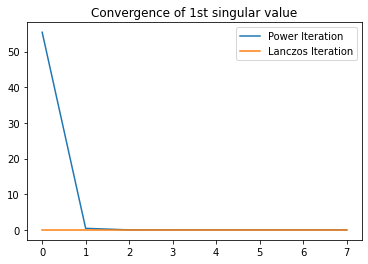

In [172]:
import matplotlib.pyplot as plt

plt.plot(pow_errors[:40], label = "Power Iteration")
plt.plot((lanc_errors+[0]*(len(pow_errors)-len(lanc_errors)))[:40], label = "Lanczos Iteration")
plt.legend(loc="upper right")
plt.title("Convergence of 1st singular value")
plt.show()

In [30]:
t

(array([[ 0.04227417, -0.00023028,  0.01169526, ...,  0.02226193,
         -0.04449002, -0.10795137],
        [ 0.00034655,  0.00055883,  0.00307559, ...,  0.01439512,
         -0.00682717,  0.00389733],
        [ 0.11459792,  0.00026836, -0.0679242 , ..., -0.06243961,
          0.01466813, -0.06907878],
        ...,
        [ 0.14995822, -0.00117946,  0.10334013, ..., -0.02879746,
         -0.01159502, -0.14935393],
        [ 0.03975303, -0.00029698, -0.04637558, ..., -0.0122143 ,
         -0.01135451, -0.00681395],
        [ 0.00369155,  0.00176392,  0.00807018, ...,  0.04291252,
         -0.03651587, -0.00261416]]),
 array([160.78727336,  71.400965  ,  66.76322023,  61.34508082,
         59.96523166,  57.36243955,  53.39748439,  51.0637573 ,
         50.27906765,  48.79593324]),
 array([[ 1.53311174e-05,  1.13094790e-05,  1.06969806e-04, ...,
          8.08407779e-04, -2.38265628e-04,  1.82342534e-04],
        [ 5.49106284e-03, -6.21416309e-05, -8.60608641e-03, ...,
         -1.6856

## MISC

In [91]:
start = time.time()
a,b,c=np.linalg.svd(X)
print(time.time()-start)
print(a,b,c)

0.5423169136047363
[[-4.17802724e-02  9.31122271e-03 -3.29545731e-02 ...  8.52306984e-19
  -2.91095147e-04  1.72295972e-04]
 [-4.09565800e-04  3.35000870e-03 -5.21393983e-03 ...  1.18376355e-16
  -7.02378257e-05 -1.45391186e-05]
 [-4.16536786e-04  1.76536085e-03 -4.11927684e-03 ... -1.35193208e-16
  -1.79546833e-04 -6.26101026e-04]
 ...
 [-3.86742388e-02 -4.62925960e-02 -1.04553338e-02 ... -5.96399899e-17
  -3.36229122e-06 -7.49653165e-04]
 [-1.41539553e-02  6.31413287e-04 -2.02915883e-02 ... -1.04380113e-16
   1.50695044e-04 -5.07973548e-04]
 [-3.66695138e-03  9.30093840e-03 -2.70790569e-02 ... -2.40627792e-17
  -1.52285710e-04 -2.75599129e-04]] [161.83088837  67.65166504  61.90599515  59.22601336  58.40466604
  54.49761659  53.50665832  50.76283832  48.60814425  47.46143172
  45.94116865  45.38479686  44.11430121  43.6040937   42.65526863
  42.58384954  42.15633715  40.7849152   40.07412795  39.77110555
  39.46779763  38.96227174  38.79039228  38.46972464  38.05944428
  37.77090685  

In [223]:
import numpy as np
import numpy.linalg as la
import copy as cp

#Generates the representation in Krylov subspace of a Hermitian NxN matrix using the Lanczos algorithm and an initial vector guess vg.
def Lanczos(H):
    vg = np.random.rand(len(H))
    Lv=np.zeros((len(vg),len(vg))) #Creates matrix for Lanczos vectors
    Hk=np.zeros((len(vg),len(vg))) #Creates matrix for the Hamiltonian in Krylov subspace
    Lv[0]=vg/la.norm(vg) #Creates the first Lanczos vector as the normalized guess vector vg
     
    #Performs the first iteration step of the Lanczos algorithm
    w=np.dot(H,Lv[0]) 
    a=np.dot(w,Lv[0])
    w=w-a*Lv[0]
    Hk[0,0]=a
     
    #Performs the iterative steps of the Lanczos algorithm
    for j in range(1,len(vg)):
        b=(np.dot(w,np.transpose(w)))**0.5
        Lv[j]=w/b
         
        w=np.dot(H,Lv[j])
        a=np.dot(w,Lv[j])
        w=w-a*Lv[j]-b*Lv[j-1]
        
        #Creates tridiagonal matrix Hk using a and b values
        Hk[j,j]=round(a,3)
        Hk[j-1,j]=round(b,3)
        Hk[j,j-1]=round(b,3)
        
    return (Hk,Lv)

In [157]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])             

In [212]:
n,m = X.shape
C = np.dot(X.T, X) / (n-1)
# C = np.dot(X.T, X)

In [141]:
eigen_vals, eigen_vecs = np.linalg.eig(A)

In [224]:
# H = X + X.T
Hk, Lv = Lanczos(C)

In [143]:
vals

array([[15.08089271,  6.63628494,  0.        ],
       [ 6.63628494,  0.17668745,  4.24804895],
       [ 0.        ,  4.24804895, 14.63257081]])

In [144]:
eigen_vals

array([ 1.61168440e+01, -1.11684397e+00, -4.22209278e-16])

In [145]:
vecs

array([[ 0.58594334,  0.39608326,  0.70695718],
       [-0.80430049,  0.39067695,  0.44774127],
       [-0.57110921, -0.30011863, -0.7640439 ]])

In [146]:
eigen_vecs

array([[-0.23197069, -0.78583024,  0.40824829],
       [-0.52532209, -0.08675134, -0.81649658],
       [-0.8186735 ,  0.61232756,  0.40824829]])

In [225]:
import time
start = time.time()
A,B= np.linalg.eig(Hk)
end = time.time()
print(end-start)

23.63612389564514


In [201]:
A

array([72.9505193 +0.j, 72.9505193 +0.j, 72.9505193 +0.j, ...,
        5.73606882+0.j,  4.66722333+0.j, 10.64037584+0.j])

In [202]:
B

array([[ 2.33427314e-01+0.j,  6.40132057e-02+0.j, -1.78411929e-02+0.j,
        ...,  1.35078973e-30+0.j, -5.51557277e-31+0.j,
         1.05922688e-32+0.j],
       [ 9.48513006e-01+0.j,  2.60112483e-01+0.j, -7.24962439e-02+0.j,
        ..., -6.59493842e-32+0.j,  8.41024494e-32+0.j,
         1.68246821e-32+0.j],
       [ 2.13937528e-01+0.j,  5.86684856e-02+0.j, -1.63515599e-02+0.j,
        ..., -1.26132921e-30+0.j,  2.54775572e-31+0.j,
        -8.53815644e-32+0.j],
       ...,
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        ..., -4.08604094e-02+0.j, -3.54722123e-01+0.j,
        -4.27839066e-01+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        ...,  2.44772109e-02+0.j,  1.23710194e-01+0.j,
        -8.41291355e-01+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        ...,  2.93894817e-02+0.j,  2.76917719e-01+0.j,
        -3.23012313e-01+0.j]])

In [226]:
start = time.time()
eigen_vals, eigen_vecs = np.linalg.eig(C)
end = time.time()
print(end-start)

15.57386589050293


In [188]:
eigen_vals

array([ 3.29164729e+01, -2.91647287e+00, -2.47766863e-16])

In [189]:
eigen_vecs

array([[-0.35162514, -0.84243284,  0.40824829],
       [-0.55335618, -0.1647127 , -0.81649658],
       [-0.75508721,  0.51300744,  0.40824829]])

In [176]:
eigen_vals, eigen_vecs = np.linalg.eig(H)

In [177]:
eigen_vals

array([ 3.29164729e+01, -2.91647287e+00, -2.47766863e-16])

In [178]:
eigen_vecs

array([[-0.35162514, -0.84243284,  0.40824829],
       [-0.55335618, -0.1647127 , -0.81649658],
       [-0.75508721,  0.51300744,  0.40824829]])

In [216]:
eigen_vals.real

array([ 7.29505193e+01,  1.27486011e+01,  1.06750759e+01, ...,
        1.37818986e-63,  2.36649483e-65, -4.77969085e-76])

In [210]:
np.linalg.svd(X)

(array([[-4.17802724e-02,  9.31122271e-03, -3.29545731e-02, ...,
          8.52306984e-19, -2.91095147e-04,  1.72295972e-04],
        [-4.09565800e-04,  3.35000870e-03, -5.21393983e-03, ...,
          1.18376355e-16, -7.02378257e-05, -1.45391186e-05],
        [-4.16536786e-04,  1.76536085e-03, -4.11927684e-03, ...,
         -1.35193208e-16, -1.79546833e-04, -6.26101026e-04],
        ...,
        [-3.86742388e-02, -4.62925960e-02, -1.04553338e-02, ...,
         -5.96399899e-17, -3.36229122e-06, -7.49653165e-04],
        [-1.41539553e-02,  6.31413287e-04, -2.02915883e-02, ...,
         -1.04380113e-16,  1.50695044e-04, -5.07973548e-04],
        [-3.66695138e-03,  9.30093840e-03, -2.70790569e-02, ...,
         -2.40627792e-17, -1.52285710e-04, -2.75599129e-04]]),
 array([161.83088837,  67.65166504,  61.90599515,  59.22601336,
         58.40466604,  54.49761659,  53.50665832,  50.76283832,
         48.60814425,  47.46143172,  45.94116865,  45.38479686,
         44.11430121,  43.6040937 ,  

In [219]:
eigen_vecs.real.T

array([[-3.88066156e-05, -1.79176451e-05, -5.38520842e-03, ...,
        -5.88170736e-04, -2.86402061e-04, -1.91539542e-04],
       [-5.31474041e-04, -1.32436239e-04,  7.19117769e-03, ...,
         2.43777499e-03,  1.63741979e-03,  1.80136506e-03],
       [ 1.18008229e-03,  2.49498563e-04, -7.77346629e-03, ...,
         1.48969785e-04, -4.00661858e-04, -2.36956166e-04],
       ...,
       [-3.49419735e-19, -1.23512553e-18,  2.43622610e-20, ...,
        -3.51498719e-17, -6.14179530e-15,  4.12075609e-17],
       [ 3.06172725e-21, -1.03920496e-18, -7.72804941e-19, ...,
        -5.60515862e-18, -1.01467518e-15,  6.04256167e-18],
       [-1.44826132e-20,  1.32521061e-18,  9.45287570e-19, ...,
        -2.81479218e-18, -4.52038480e-16,  3.42733338e-18]])

In [221]:
B.real

array([[ 2.63386507e-01,  2.97138550e-02,  1.79112210e-06, ...,
        -9.15459429e-32, -4.58915401e-30, -6.97897715e-31],
       [ 9.45827304e-01,  1.06703170e-01,  6.43196269e-06, ...,
         2.57948083e-32,  3.14848967e-31, -3.53439052e-32],
       [ 1.89695784e-01,  2.14004624e-02,  1.28999893e-06, ...,
         7.02596649e-33,  5.06039207e-30,  1.20048681e-30],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.26787495e-01, -3.51240715e-01,  2.98684456e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.00809620e-01, -1.31625550e-01,  1.43894274e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.60096417e-02, -3.14722860e-02,  4.31289175e-02]])

In [222]:
Hk

array([[ 7.63173476, 18.18945851,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [18.18945851, 65.31888984, 12.79599115, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 12.79599115,  9.04977682, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  5.86655821,
         1.52842405,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  1.52842405,
         2.26321855,  0.99942448],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.99942448,  2.40089976]])

In [88]:
def svd_simultaneous_power_iteration(A, k, epsilon=0.00001):
    #source http://mlwiki.org/index.php/Power_Iteration
    #adjusted to work with n<m and n>m matrices
    n_orig, m_orig = A.shape
    if k is None:
        k=min(n_orig,m_orig)
    A_orig=A.copy()
    if n_orig > m_orig:
        A = A.T @ A
        n, m = A.shape
    elif n_orig < m_orig:
        A = A @ A.T
        n, m = A.shape
    else:
        n,m=n_orig, m_orig
        
    Q = np.random.rand(n, k)
    Q, _ = np.linalg.qr(Q)
    Q_prev = Q
    #this part does the block power iteration
    for i in range(1000):
        Z = A @ Q
        Q, R = np.linalg.qr(Z)
        err = ((Q - Q_prev) ** 2).sum()
        Q_prev = Q
        if err < epsilon:
            break
            
    singular_values=np.sqrt(np.diag(R)) 
    #deal with different shape input matrices
    if n_orig < m_orig: 
        left_vecs=Q.T
        #use property Values @ V = U.T@A => V=inv(Values)@U.T@A
        right_vecs=np.linalg.inv(np.diag(singular_values))@left_vecs.T@A_orig
    elif n_orig==m_orig:
        left_vecs=Q.T
        right_vecs=left_vecs
        singular_values=np.square(singular_values)
    else:
        right_vecs=Q.T
        #use property Values @ V = U.T@A => U=A@V@inv(Values)
        left_vecs=A_orig@ right_vecs.T @np.linalg.inv(np.diag(singular_values))

    return left_vecs, singular_values, right_vecs

In [2]:
import numpy as np
import numpy.linalg as la
import copy as cp

#Generates the representation in Krylov subspace of a Hermitian NxN matrix using the Lanczos algorithm and an initial vector guess vg.
def Lanczos(H,vg):
    Lv=np.zeros((len(vg),len(vg)), dtype=complex) #Creates matrix for Lanczos vectors
    Hk=np.zeros((len(vg),len(vg)), dtype=complex) #Creates matrix for the Hamiltonian in Krylov subspace
    Lv[0]=vg/la.norm(vg) #Creates the first Lanczos vector as the normalized guess vector vg
     
    #Performs the first iteration step of the Lanczos algorithm
    w=np.dot(H,Lv[0]) 
    a=np.dot(np.conj(w),Lv[0])
    w=w-a*Lv[0]
    Hk[0,0]=a
     
    #Performs the iterative steps of the Lanczos algorithm
    for j in range(1,len(vg)):
        b=(np.dot(np.conj(w),np.transpose(w)))**0.5
        Lv[j]=w/b
         
        w=np.dot(H,Lv[j])
        a=np.dot(np.conj(w),Lv[j])
        w=w-a*Lv[j]-b*Lv[j-1]
        
        #Creates tridiagonal matrix Hk using a and b values
        Hk[j,j]=a
        Hk[j-1,j]=b
        Hk[j,j-1]=np.conj(b)
        
    return (Hk,Lv)

In [95]:
import numpy as np
import scipy.sparse as sp
import warnings
#import pdb

# Matrix-vector product wrapper
# A is a numpy 2d array or matrix, or a scipy matrix or sparse matrix.
# x is a numpy vector only.
# Compute A.dot(x) if t is False,
#         A.transpose().dot(x)  otherwise.
def mult(A,x,t=False):
    if(sp.issparse(A)):
        m = A.shape[0]
        n = A.shape[1]
        if(t):
            return(sp.csr_matrix(x).dot(A).transpose().todense().A[:,0])    
        return(A.dot(sp.csr_matrix(x).transpose()).todense().A[:,0])
    if(t):
        return(x.dot(A))
    return(A.dot(x))

def orthog(Y,X):
    """Orthogonalize a vector or matrix Y against the columns of the matrix X.
  This function requires that the column dimension of Y is less than X and
  that Y and X have the same number of rows.
    """
    dotY = mult(X,Y,t=True)
    return (Y - mult(X,dotY))

# Simple utility function used to check linear dependencies during computation:
def invcheck(x):
    eps2 = 2*np.finfo(np.float).eps
    if(x>eps2):
        x = 1/x
    else:
        x = 0
    warnings.warn("Ill-conditioning encountered, result accuracy may be poor")
    return(x)

def irlb(A,n,tol=0.0001,maxit=50):
    """Estimate a few of the largest singular values and corresponding singular
  vectors of matrix using the implicitly restarted Lanczos bidiagonalization
  method of Baglama and Reichel, see:
  Augmented Implicitly Restarted Lanczos Bidiagonalization Methods,
  J. Baglama and L. Reichel, SIAM J. Sci. Comput. 2005
  Keyword arguments:
  tol   -- An estimation tolerance. Smaller means more accurate estimates.
  maxit -- Maximum number of Lanczos iterations allowed.
  Given an input matrix A of dimension j * k, and an input desired number
  of singular values n, the function returns a tuple X with five entries:
  X[0] A j * nu matrix of estimated left singular vectors.
  X[1] A vector of length nu of estimated singular values.
  X[2] A k * nu matrix of estimated right singular vectors.
  X[3] The number of Lanczos iterations run.
  X[4] The number of matrix-vector products run.
  The algorithm estimates the truncated singular value decomposition:
  A.dot(X[2]) = X[0]*X[1].
  """
    nu     = n
    m      = A.shape[0]
    n      = A.shape[1]
    if(min(m,n)<2):
        raise Exception("The input matrix must be at least 2x2.")
    m_b    = min((nu+20, 3*nu, n))  # Working dimension size
    mprod  = 0
    it     = 0
    j      = 0
    k      = nu
    smax   = 1
    sparse = sp.issparse(A)

    V  = np.zeros((n,m_b))
    W  = np.zeros((m,m_b))
    F  = np.zeros((n,1))
    B  = np.zeros((m_b,m_b))

    V[:,0]  = np.random.randn(n) # Initial vector
    V[:,0]  = V[:,0]/np.linalg.norm(V)

    while(it < maxit):
        if(it>0): 
            j=k
        W[:,j] = mult(A,V[:,j])
        mprod+=1
        if(it>0):
            W[:,j] = orthog(W[:,j],W[:,0:j]) # NB W[:,0:j] selects columns 0,1,...,j-1
        s = np.linalg.norm(W[:,j])
        sinv = invcheck(s)
        W[:,j] = sinv*W[:,j]
        # Lanczos process
        while(j<m_b):
            F = mult(A,W[:,j],t=True)
            mprod+=1
            F = F - s*V[:,j]
            F = orthog(F,V[:,0:j+1])
            fn = np.linalg.norm(F)
            fninv= invcheck(fn)
            F  = fninv * F
            if(j<m_b-1):
                V[:,j+1] = F
                B[j,j] = s
                B[j,j+1] = fn 
                W[:,j+1] = mult(A,V[:,j+1])
                mprod+=1
                # One step of classical Gram-Schmidt...
                W[:,j+1] = W[:,j+1] - fn*W[:,j]
                # ...with full reorthogonalization
                W[:,j+1] = orthog(W[:,j+1],W[:,0:(j+1)])
                s = np.linalg.norm(W[:,j+1])
                sinv = invcheck(s) 
                W[:,j+1] = sinv * W[:,j+1]
            else:
                B[j,j] = s
            j+=1
        # End of Lanczos process
        S = np.linalg.svd(B)
        R = fn * S[0][m_b-1,:] # Residuals
        if(it<1):
            smax = S[1][0]  # Largest Ritz value
        else:
            smax = max((S[1][0],smax))

        conv = sum(np.abs(R[0:nu]) < tol*smax)
        if(conv < nu):  # Not coverged yet
            k = max(conv+nu,k)
            k = min(k,m_b-3)
        else:
            break
        # Update the Ritz vectors
        V[:,0:k] = V[:,0:m_b].dot(S[2].transpose()[:,0:k])
        V[:,k] = F 
        B = np.zeros((m_b,m_b))
        # Improve this! There must be better way to assign diagonal...
        for l in range(0,k):
            B[l,l] = S[1][l]
        B[0:k,k] = R[0:k]
        # Update the left approximate singular vectors
        W[:,0:k] = W[:,0:m_b].dot(S[0][:,0:k])
        it+=1

    U = W[:,0:m_b].dot(S[0][:,0:nu])
    V = V[:,0:m_b].dot(S[2].transpose()[:,0:nu])
    return((U,S[1][0:nu],V,it,mprod))

In [96]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])             
t = irlb(X,10)

/var/folders/cd/w1f7xydj207_nsn7j5krs5940000gn/T/ipykernel_69107/3565503635.py:32: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps2 = 2*np.finfo(np.float).eps
/var/folders/cd/w1f7xydj207_nsn7j5krs5940000gn/T/ipykernel_69107/3565503635.py:37: UserWarning: Ill-conditioning encountered, result accuracy may be poor
  warnings.warn("Ill-conditioning encountered, result accuracy may be poor")


In [97]:
t

(array([[-0.04178027,  0.00931122, -0.03295457, ..., -0.01039195,
          0.11934285,  0.00405195],
        [-0.00040957,  0.00335001, -0.00521394, ..., -0.00548173,
          0.00374755, -0.00898227],
        [-0.00041654,  0.00176536, -0.00411928, ..., -0.00290501,
          0.00148196,  0.00113503],
        ...,
        [-0.03867424, -0.0462926 , -0.01045533, ..., -0.0193113 ,
          0.00643976, -0.00831421],
        [-0.01415396,  0.00063141, -0.02029159, ...,  0.02789658,
          0.00228445, -0.02044759],
        [-0.00366695,  0.00930094, -0.02707906, ..., -0.03221386,
          0.03643495,  0.01172821]]),
 array([161.83088837,  67.65166504,  61.90599515,  59.22601336,
         58.40466604,  54.49761659,  53.50665832,  50.76283832,
         48.60814425,  47.46143172]),
 array([[-3.88066156e-05,  5.31474041e-04, -1.18008229e-03, ...,
         -2.59763990e-03,  3.33108857e-03, -9.98475579e-05],
        [-1.79176451e-05,  1.32436239e-04, -2.49498563e-04, ...,
         -2.1329

In [93]:
np.linalg.svd(X)

(array([[-4.17802724e-02,  9.31122271e-03, -3.29545731e-02, ...,
          8.52306984e-19, -2.91095147e-04,  1.72295972e-04],
        [-4.09565800e-04,  3.35000870e-03, -5.21393983e-03, ...,
          1.18376355e-16, -7.02378257e-05, -1.45391186e-05],
        [-4.16536786e-04,  1.76536085e-03, -4.11927684e-03, ...,
         -1.35193208e-16, -1.79546833e-04, -6.26101026e-04],
        ...,
        [-3.86742388e-02, -4.62925960e-02, -1.04553338e-02, ...,
         -5.96399899e-17, -3.36229122e-06, -7.49653165e-04],
        [-1.41539553e-02,  6.31413287e-04, -2.02915883e-02, ...,
         -1.04380113e-16,  1.50695044e-04, -5.07973548e-04],
        [-3.66695138e-03,  9.30093840e-03, -2.70790569e-02, ...,
         -2.40627792e-17, -1.52285710e-04, -2.75599129e-04]]),
 array([161.83088837,  67.65166504,  61.90599515,  59.22601336,
         58.40466604,  54.49761659,  53.50665832,  50.76283832,
         48.60814425,  47.46143172,  45.94116865,  45.38479686,
         44.11430121,  43.6040937 ,  

In [98]:
svd_simultaneous_power_iteration(X, 10)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 360 is different from 10)

In [104]:
from numpy.linalg import norm

from random import normalvariate
from math import sqrt


def randomUnitVector(n):
    unnormalized = [normalvariate(0, 1) for _ in range(n)]
    theNorm = sqrt(sum(x * x for x in unnormalized))
    return [x / theNorm for x in unnormalized]


def svd_1d(A, epsilon=1e-10):
    ''' The one-dimensional SVD '''

    n, m = A.shape
    x = randomUnitVector(min(n,m))
    lastV = None
    currentV = x

    if n > m:
        B = np.dot(A.T, A)
    else:
        B = np.dot(A, A.T)

    iterations = 0
    while True:
        iterations += 1
        lastV = currentV
        currentV = np.dot(B, lastV)
        currentV = currentV / norm(currentV)

        if abs(np.dot(currentV, lastV)) > 1 - epsilon:
            print("converged in {} iterations!".format(iterations))
            return currentV


def svd(A, k=None, epsilon=1e-10):
    '''
        Compute the singular value decomposition of a matrix A
        using the power method. A is the input matrix, and k
        is the number of singular values you wish to compute.
        If k is None, this computes the full-rank decomposition.
    '''
    A = np.array(A, dtype=float)
    n, m = A.shape
    svdSoFar = []
    if k is None:
        k = min(n, m)

    for i in range(k):
        matrixFor1D = A.copy()

        for singularValue, u, v in svdSoFar[:i]:
            matrixFor1D -= singularValue * np.outer(u, v)

        if n > m:
            v = svd_1d(matrixFor1D, epsilon=epsilon)  # next singular vector
            u_unnormalized = np.dot(A, v)
            sigma = norm(u_unnormalized)  # next singular value
            u = u_unnormalized / sigma
        else:
            u = svd_1d(matrixFor1D, epsilon=epsilon)  # next singular vector
            v_unnormalized = np.dot(A.T, u)
            sigma = norm(v_unnormalized)  # next singular value
            v = v_unnormalized / sigma

        svdSoFar.append((sigma, u, v))

    singularValues, us, vs = [np.array(x) for x in zip(*svdSoFar)]
    return singularValues, us.T, vs

In [106]:
svd(X, 10)

converged in 8 iterations!
converged in 56 iterations!
converged in 70 iterations!
converged in 223 iterations!
converged in 86 iterations!
converged in 179 iterations!
converged in 103 iterations!
converged in 83 iterations!
converged in 169 iterations!
converged in 136 iterations!


(array([161.83088837,  67.65166502,  61.90599514,  59.22601316,
         58.40466624,  54.49761649,  53.50665841,  50.76283831,
         48.6081442 ,  47.46143175]),
 array([[ 0.04178026,  0.00931347,  0.03295224, ...,  0.01037693,
         -0.11934554, -0.004019  ],
        [ 0.00040956,  0.00335038,  0.00521521, ...,  0.00548091,
         -0.00374578,  0.00899177],
        [ 0.00041653,  0.00176565,  0.00412005, ...,  0.00290596,
         -0.00148271, -0.001132  ],
        ...,
        [ 0.03867421, -0.04629189,  0.01045808, ...,  0.01931354,
         -0.00644023,  0.00832   ],
        [ 0.01415393,  0.00063282,  0.02029274, ..., -0.02789821,
         -0.00227447,  0.02044847],
        [ 0.00366691,  0.00930285,  0.02708594, ...,  0.03221257,
         -0.03644306, -0.0117006 ]]),
 array([[ 3.88058057e-05,  1.79175157e-05,  5.38520927e-03, ...,
          5.88169961e-04,  2.86401897e-04,  1.91539121e-04],
        [ 5.31550423e-04,  1.32452330e-04, -7.19167287e-03, ...,
         -2.4377

In [56]:
def set_lowVal_zero(X):
    low_values_indices = abs(X) < 9e-15   # where values are low
    X[low_values_indices] = 0             # all low values set to 0
    return X
def Householder(x, i):
    alpha = -np.sign(x[i]) * np.linalg.norm(x)
    e = np.zeros(len(x)); e[i] = 1.0
    
    v = (x - alpha * e)
    w = v / np.linalg.norm(v)
    P = np.eye(len(x)) - 2 * np.outer(w, w.T)
    
    return P
def Golub_Kahan(X):
    col = X.shape[1]
    row = X.shape[0]
    
    J = X.copy()

    for i in range(col - 2):
        # column
        h = np.zeros(len(J[:, i]))
        h[i:] = J[i:, i]
        P = Householder(h, i)
        J = set_lowVal_zero(P @ J)
#         print(J, '\n')

        # row
        h = np.zeros(len(J[i, :]))
        h[i+1:] = J[i, i+1:] 
        Q = Householder(h, i+1)
        J = set_lowVal_zero(J @ Q)
#         print(J, '\n')
        
    return J

In [61]:
import random
A = np.array([[random.randint(1,100) for i in range(100)] for j in range(1000)])

In [62]:
J = Golub_Kahan(A)

In [63]:
start = time.time()
x,y,z = np.linalg.svd(A)
print(time.time()-start)

0.07663893699645996


In [64]:
start = time.time()
a,b,c = np.linalg.svd(J)
print(time.time()-start)

0.0425410270690918


In [77]:
c.T

array([[ 1.00383368e-01, -6.17348157e-02,  3.83490076e-02, ...,
         1.83806885e-01, -7.82053326e-02,  1.39339680e-01],
       [-9.94892463e-01, -4.83085171e-03,  3.03342511e-03, ...,
         2.13817486e-02, -9.10587715e-03,  1.62912940e-02],
       [-1.05908834e-02, -1.31142780e-01,  7.84193527e-02, ...,
        -2.66686067e-01,  1.14266389e-01, -2.09925392e-01],
       ...,
       [ 9.94718530e-18, -1.76990512e-17,  7.35189964e-17, ...,
        -5.07367453e-17,  2.86466587e-17, -1.01119911e-16],
       [ 4.04097071e-17, -7.08292381e-17,  4.14844195e-17, ...,
        -1.24705862e-16,  3.24501711e-17, -9.45529881e-17],
       [ 2.14648369e-17, -1.54402975e-17, -5.70280474e-18, ...,
        -1.39140059e-16, -6.67036028e-18, -2.76933742e-17]])

In [76]:
z

array([[-0.10038337, -0.09671509, -0.09909753, ..., -0.09991456,
        -0.09918329, -0.09730325],
       [-0.06173482,  0.16960964, -0.15376708, ..., -0.21675472,
         0.00657244, -0.0423968 ],
       [ 0.03834901, -0.10862054, -0.11564818, ..., -0.16491555,
        -0.14808381,  0.27528965],
       ...,
       [ 0.18380689, -0.08894825, -0.1277318 , ...,  0.06456141,
        -0.10047648,  0.11324201],
       [-0.07820533,  0.19979301, -0.01655909, ..., -0.14120975,
         0.13460367,  0.17158803],
       [ 0.13933968,  0.05970903, -0.00792578, ...,  0.03977951,
         0.06012179, -0.06967841]])

EOF